<a href="https://colab.research.google.com/github/jehee-lee/Aerospace_capstone_design/blob/main/(%EC%8B%A4%EC%8A%B59)_%EB%8B%A4%EC%B8%B5_%ED%95%84%ED%84%B0_%ED%95%99%EC%8A%B5_%EB%B0%8F_%EA%B2%80%EC%A6%9D(DNN_Filter).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

                  #데이터 기본구조 생성


A = np.zeros((2,2))
B = np.zeros((2,1))
C = np.zeros((1,2))

#실험 조건, 데이터 사이즈 설정

N = 10000 #number of timesteps

x = np.zeros((2,N+1))
x[:,0]=[0,0]
y = np.zeros((1,N))
dx = np.zeros((1,N))

pos_t = np.zeros((1,N))
temp_pos_t = np.zeros((1,N))

T=500 #time will vary from 0 to T with step delt
ts = np.linspace(0, T, N+1)
del_t = T/N # delta_t = 0.05 = 500 / 10000
gamma = 0.05 #damping

#정규분포 노이즈 생성
np.random.seed(370)
w = np.random.randn(1,N)
n = np.random.randn(1,N)

# X행렬 구성성분
A[0,0] = 1
A[0,1] = (1-gamma*del_t/2)*del_t
A[1,1] = 1 - gamma*del_t

B[0,0] = del_t**2/2
B[1,0] = del_t

C[0,0] = 1

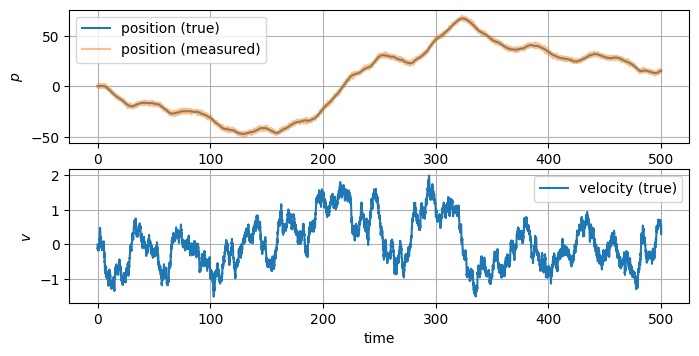

In [3]:
for t in range(N):
    y[:,t] = C.dot(x[:,t]) + n[:,t]
    x[:,t+1] = A.dot(x[:,t]) + B.dot(w[:,t])


plt.figure(figsize=(8,6), dpi=100)
plt.subplot(3,1,1)
plt.plot(ts,x[0,:], label='position (true)')
#measured 값은 y값으로 x+noise값이다.
plt.plot(ts[:-1],y[0,:], alpha=0.5, label='position (measured)')
plt.ylabel(r'$p$')
plt.legend()
plt.grid()
plt.subplot(3,1,2)
plt.plot(ts,x[1,:], label='velocity (true)')
plt.xlabel('time')
plt.ylabel(r'$v$')
plt.legend()
plt.grid()

Activation = None

====================시작===================
(500, 10) (500, 1)

====================모델 생성===================
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 11        
Total params:

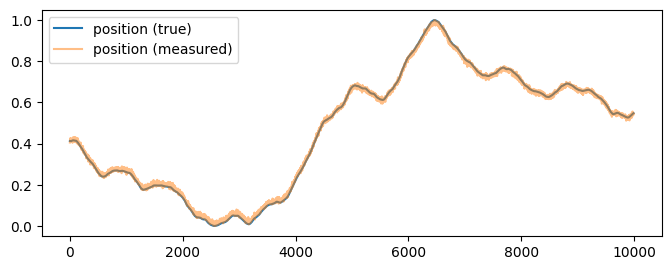

In [ ]:
#데이터 입력
print("====================시작===================")
DS ,ND = 10, 500  #ND = n_len
train_input = np.empty((0, DS))

#train input 구축 train_input은 노이즈가 x+noise=y값
for i in range(ND):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  train_input=np.append(train_input,[reshaped_y],axis=0)


train_target = (x[1,DS:ND+DS]).copy()
train_target = np.reshape(train_target, [ND, 1])

#데이터 정규화
def Normalization(in_x):
  MeanN=MinMaxScaler()
  Mean=None
  Mean=MeanN.fit(in_x)
  return Mean.transform(in_x)


Norm_train_input=Normalization(train_input)
Norm_train_target=Normalization(train_target)


print(train_input.shape, train_target.shape)

hist = None


#모델 생성
print("")
print("====================모델 생성===================")
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(DS, input_dim=DS),
  tf.keras.layers.Dense(DS),
  tf.keras.layers.Dense(DS),
  tf.keras.layers.Dense(DS),
  tf.keras.layers.Dense(DS),
  tf.keras.layers.Dense(1)
  ])
model.compile(optimizer = "Adam",loss = 'mse',metrics=['mae','mse'])
model.summary()  

#학습
print("====================학습===================")
model.fit(Norm_train_input,Norm_train_target, epochs = 500,validation_split=0.2, shuffle='True',verbose=1)

#출력할 데이터 만들기
input_data = np.empty((0,DS))
true_data = np.reshape(x[0,DS+1:],([N-DS,1]))


for i in range(N-DS):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  input_data=np.append(input_data,[reshaped_y],axis=0)

plt.figure(figsize=(8,3), dpi=100)
plt.plot(Normalization(true_data), label='position (true)')
plt.plot(Normalization(model.predict(Normalization(input_data))),alpha=0.5, label='position (measured)')
plt.legend(loc='best')
plt.show()

Layer가 깊어졌을 때 정확도가 개선되었음

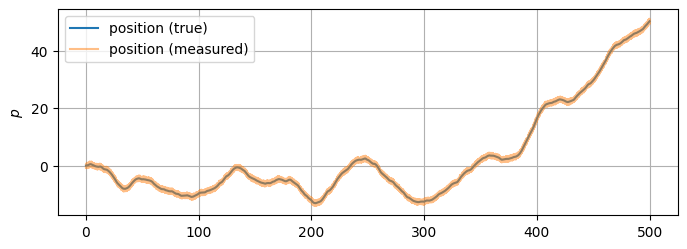

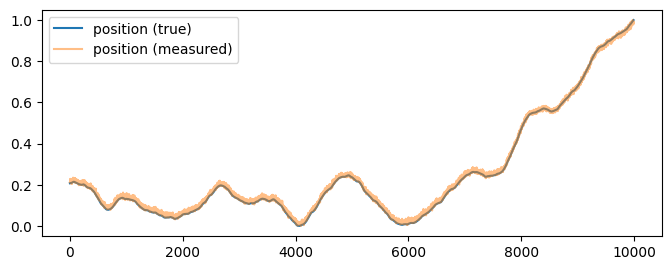

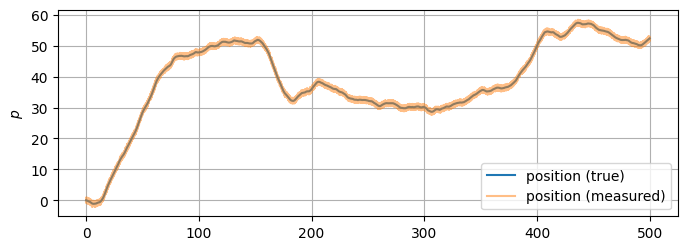

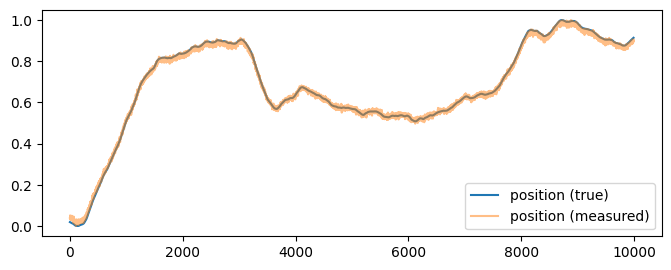

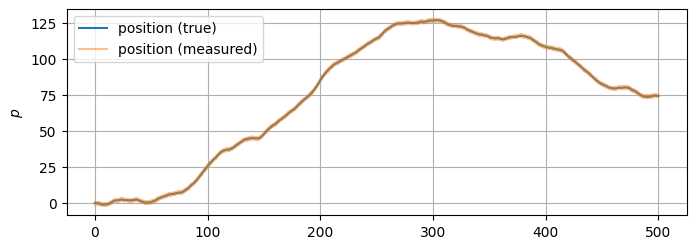

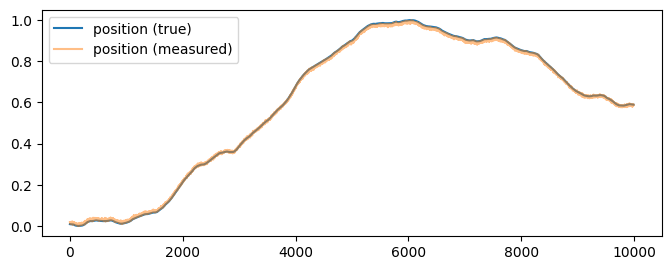

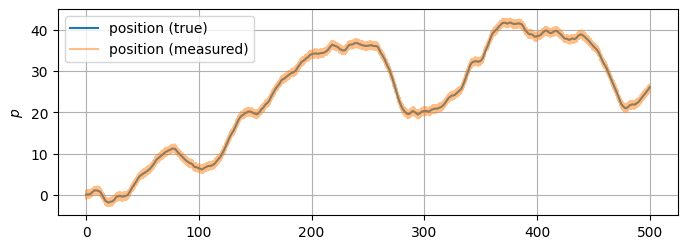

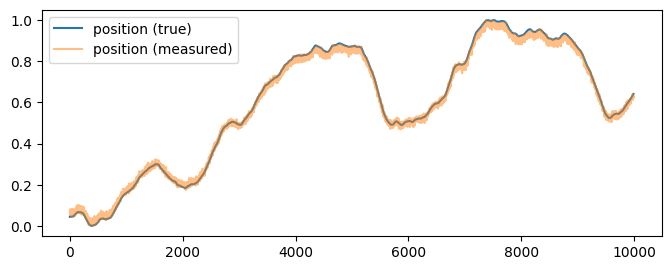

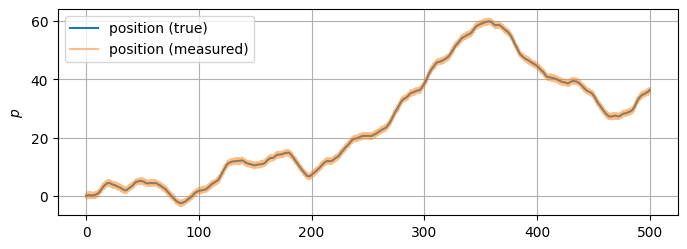

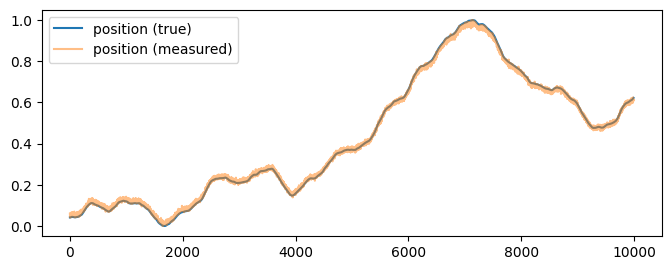

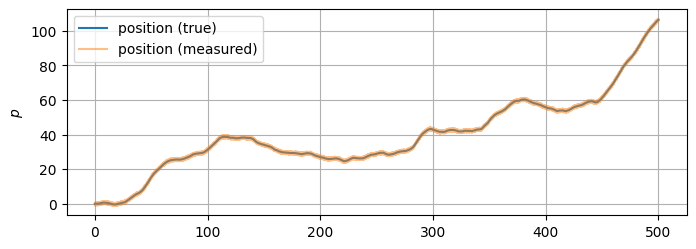

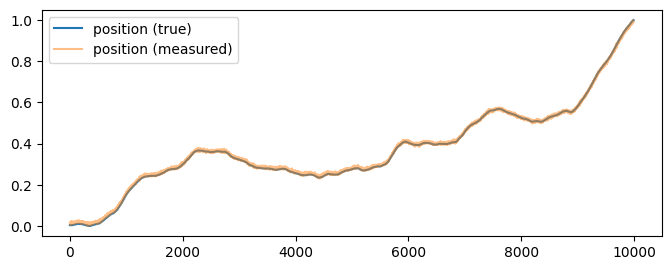

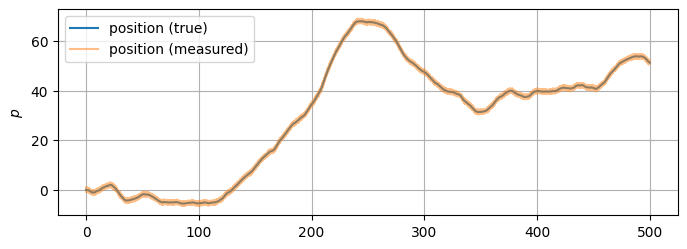

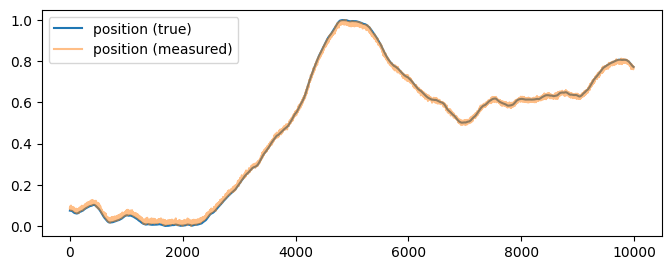

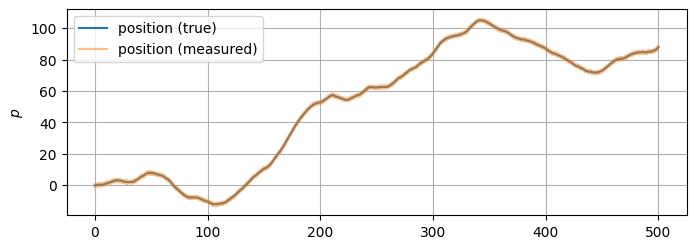

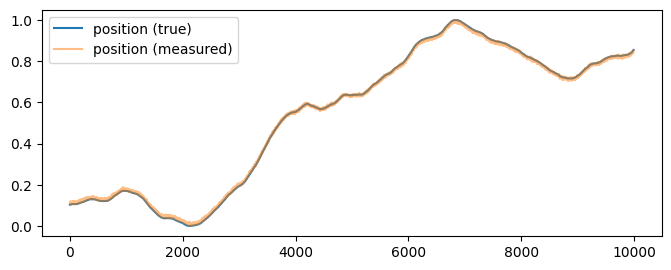

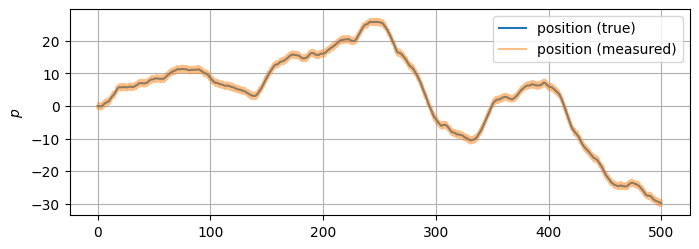

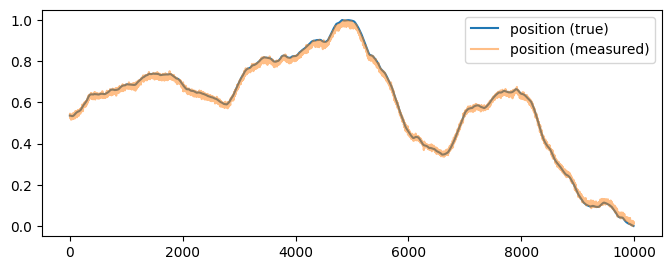

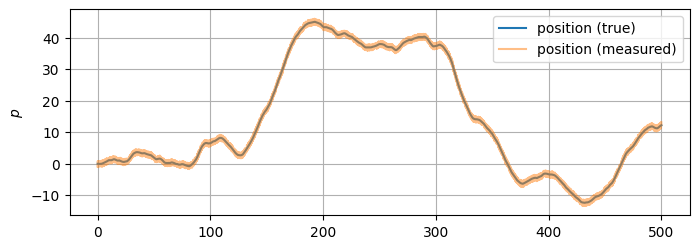

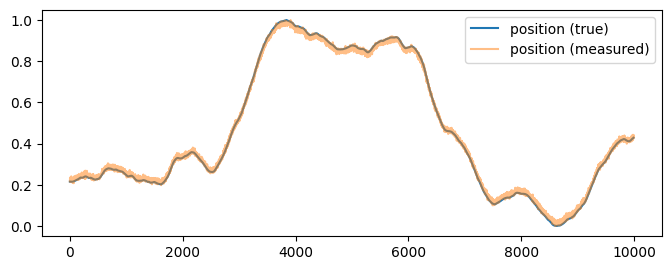

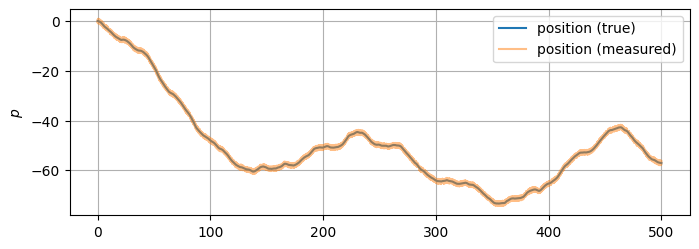

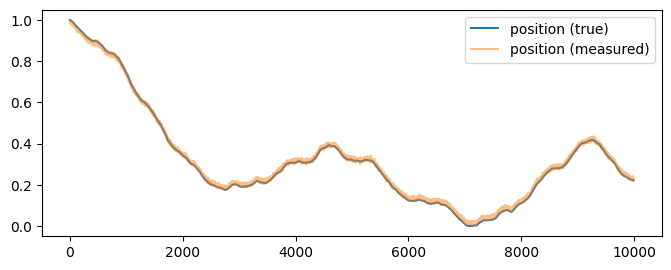

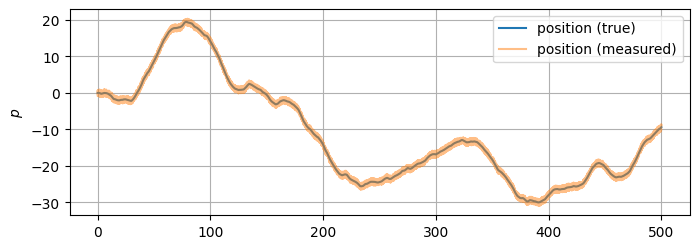

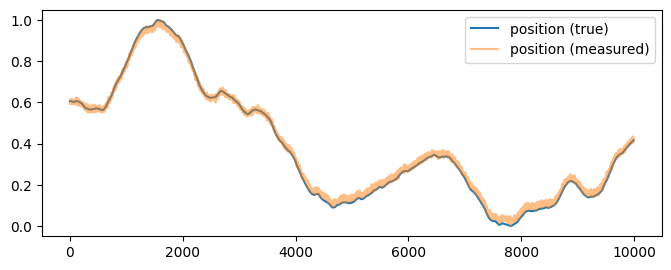

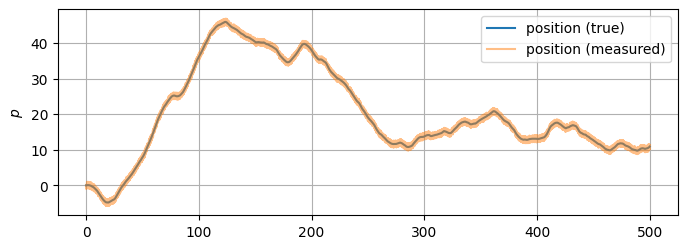

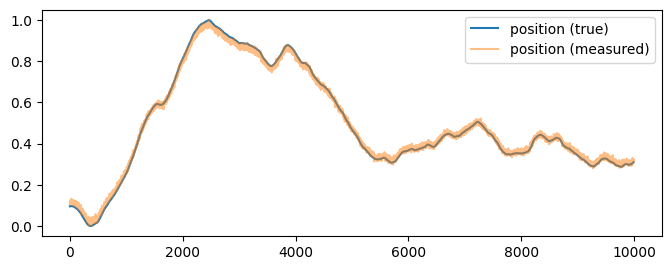

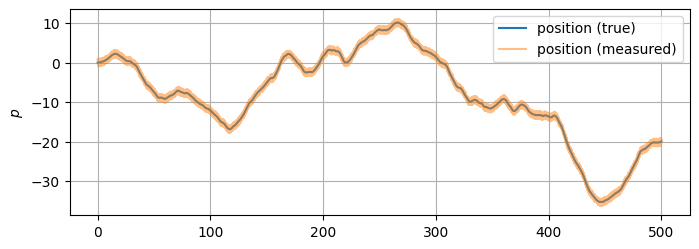

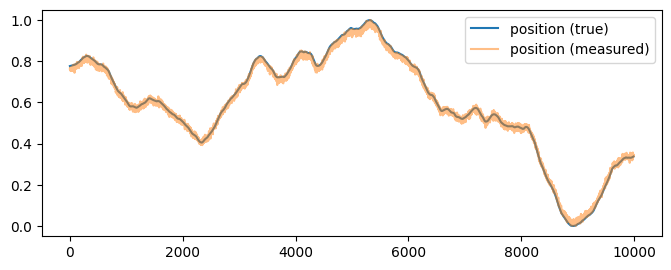

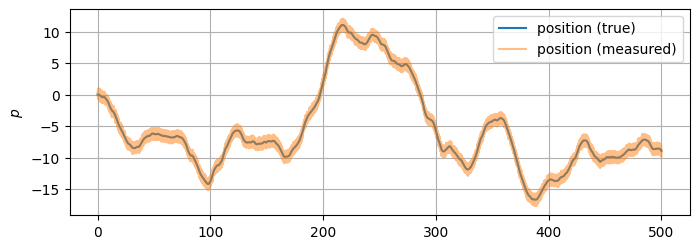

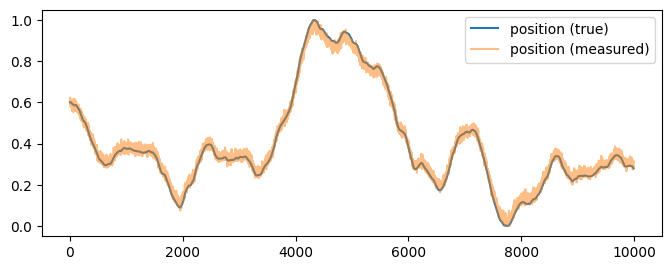

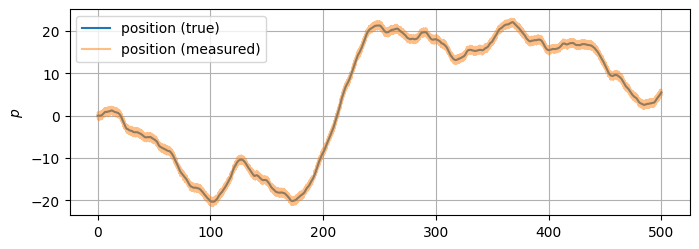

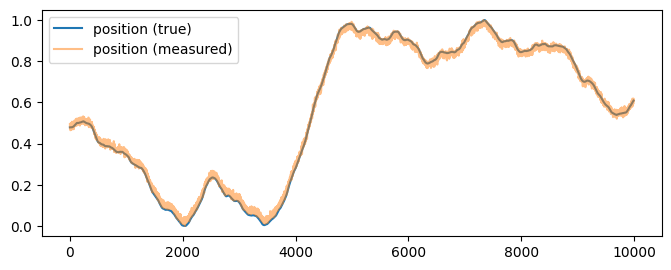

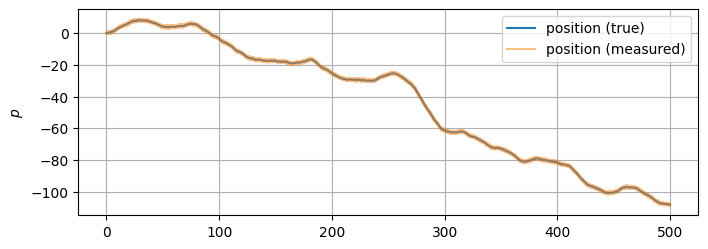

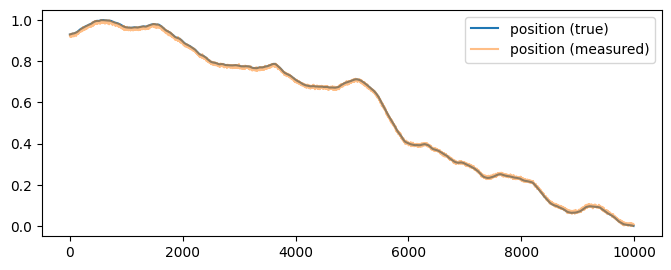

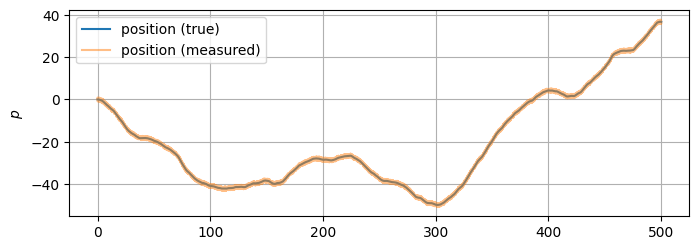

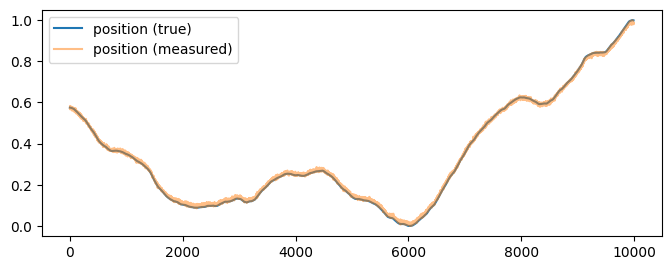

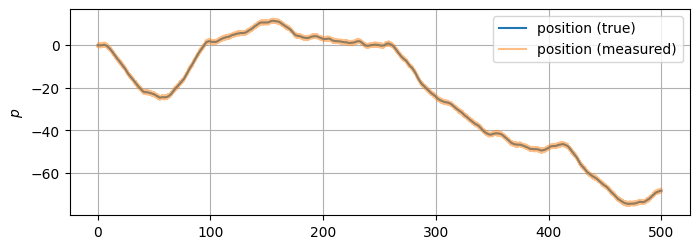

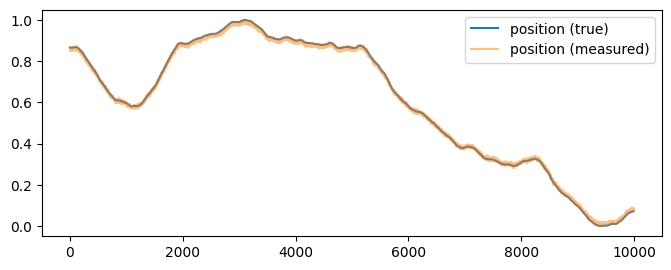

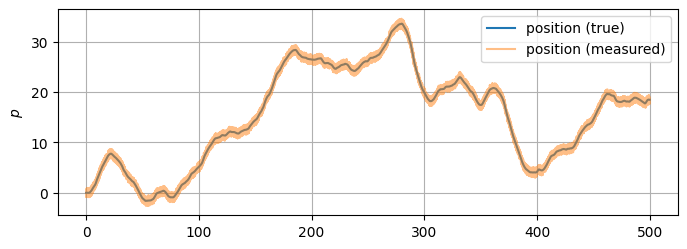

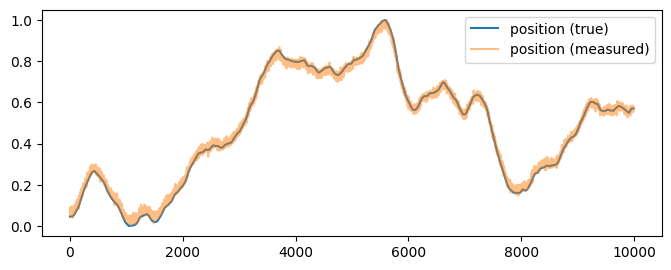

In [ ]:
for num in range(20):
  w = np.reshape(1-2*np.random.rand(N),(1,N))
  n = np.reshape(1-2*np.random.rand(N),(1,N))

  for t in range(N):
      y[:,t] = C.dot(x[:,t]) + n[:,t]
      x[:,t+1] = A.dot(x[:,t]) + B.dot(w[:,t])

  plt.figure(figsize=(8,6), dpi=100)
  plt.subplot(2,1,1)
  plt.plot(ts,x[0,:], label='position (true)')
  #measured 값은 y값으로 x+noise값이다.
  plt.plot(ts[:-1],y[0,:], alpha=0.5, label='position (measured)')
  plt.ylabel(r'$p$')
  plt.legend()
  plt.grid()

  input_data = np.empty((0,DS))
  true_data = np.reshape(x[0,DS+1:],([N-DS,1]))


  for i in range(N-DS):
    reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
    input_data=np.append(input_data,[reshaped_y],axis=0)

  plt.figure(figsize=(8,3), dpi=100)
  plt.plot(Normalization(true_data), label='position (true)')
  plt.plot(Normalization(model.predict(Normalization(input_data))),alpha=0.5, label='position (measured)')
  plt.legend(loc='best')
  plt.show()


====================시작===================
(500, 5) (500, 1)

====================모델 생성===================
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_120 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_121 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_122 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_123 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 6         
Total params:

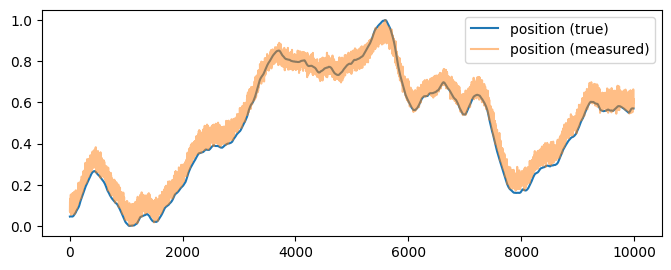

In [ ]:
#데이터 입력
print("====================시작===================")
DS ,ND = 5, 500  #ND = n_len
train_input = np.empty((0, DS))

#train input 구축 train_input은 노이즈가 x+noise=y값
for i in range(ND):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  train_input=np.append(train_input,[reshaped_y],axis=0)


train_target = (x[1,DS:ND+DS]).copy()
train_target = np.reshape(train_target, [ND, 1])

#데이터 정규화
def Normalization(in_x):
  MeanN=MinMaxScaler()
  Mean=None
  Mean=MeanN.fit(in_x)
  return Mean.transform(in_x)


Norm_train_input=Normalization(train_input)
Norm_train_target=Normalization(train_target)


print(train_input.shape, train_target.shape)

hist = None


#모델 생성
print("")
print("====================모델 생성===================")
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(DS, input_dim=DS, activation = 'sigmoid'),
  tf.keras.layers.Dense(DS, activation = 'sigmoid'),
  tf.keras.layers.Dense(DS, activation = 'sigmoid'),
  tf.keras.layers.Dense(DS, activation = 'sigmoid'),
  tf.keras.layers.Dense(DS, activation = 'sigmoid'),
  tf.keras.layers.Dense(1)
  ])
model.compile(optimizer = "Adam",loss = 'BinaryCrossentropy',metrics=['mae','mse'])
model.summary()  

#학습
print("====================학습===================")
model.fit(Norm_train_input,Norm_train_target, epochs = 300,validation_split=0.2, shuffle='True',verbose=1)

#출력할 데이터 만들기
input_data = np.empty((0,DS))
true_data = np.reshape(x[0,DS+1:],([N-DS,1]))


for i in range(N-DS):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  input_data=np.append(input_data,[reshaped_y],axis=0)

plt.figure(figsize=(8,3), dpi=100)
plt.plot(Normalization(true_data), label='position (true)')
plt.plot(Normalization(model.predict(Normalization(input_data))),alpha=0.5, label='position (measured)')
plt.legend(loc='best')
plt.show()

====================시작===================
(500, 5) (500, 1)

====================모델 생성===================
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 

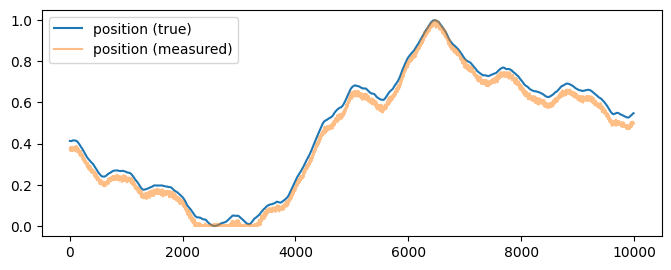

In [7]:
#데이터 입력
print("====================시작===================")
DS ,ND = 5, 500  #ND = n_len
train_input = np.empty((0, DS))

#train input 구축 train_input은 노이즈가 x+noise=y값
for i in range(ND):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  train_input=np.append(train_input,[reshaped_y],axis=0)


train_target = (x[1,DS:ND+DS]).copy()
train_target = np.reshape(train_target, [ND, 1])

#데이터 정규화
def Normalization(in_x):
  MeanN=MinMaxScaler()
  Mean=None
  Mean=MeanN.fit(in_x)
  return Mean.transform(in_x)


Norm_train_input=Normalization(train_input)
Norm_train_target=Normalization(train_target)


print(train_input.shape, train_target.shape)

hist = None


#모델 생성
print("")
print("====================모델 생성===================")
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(DS, input_dim=DS, activation = 'relu'),
  tf.keras.layers.Dense(DS, activation = 'relu'),
  tf.keras.layers.Dense(DS, activation = 'relu'),
  tf.keras.layers.Dense(DS, activation = 'relu'),
  tf.keras.layers.Dense(DS, activation = 'relu'),
  tf.keras.layers.Dense(1)
  ])
model.compile(optimizer = "Adam",loss = 'mse',metrics=['mae','mse'])
model.summary()  

#학습
print("====================학습===================")
model.fit(Norm_train_input,Norm_train_target, epochs = 300,validation_split=0.2, shuffle='True',verbose=1)

#출력할 데이터 만들기
input_data = np.empty((0,DS))
true_data = np.reshape(x[0,DS+1:],([N-DS,1]))


for i in range(N-DS):
  reshaped_y=np.reshape(y[0,i+1:DS+i+1], [DS])
  input_data=np.append(input_data,[reshaped_y],axis=0)

plt.figure(figsize=(8,3), dpi=100)
plt.plot(Normalization(true_data), label='position (true)')
plt.plot(Normalization(model.predict(Normalization(input_data))),alpha=0.5, label='position (measured)')
plt.legend(loc='best')
plt.show()

Relu함수를 이용해도 정확도가 개선되지는 않는다.